Dataset : Credit card default

Objective : Create a model to predict default_payment_next_month, using cross validation for selecting the best classification model.

# II. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score


import joblib
import json
import warnings
warnings.simplefilter("ignore")

# III. Data Loading

In [2]:
# load data
raw_data = pd.read_csv('h8dsft_P1M1_Samuel_Naiborhu.csv')
pd.set_option('display.max_columns', None)
raw_data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0


In [3]:
raw_data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,-1,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,-1,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,-2,379,0,0,0,0,0,0,0,0,0,0,0,0


# IV. Exploratory Data Analysis (EDA)

In [4]:
raw_data.describe()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


In [5]:
# see how much imbalance the dataset is
raw_data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

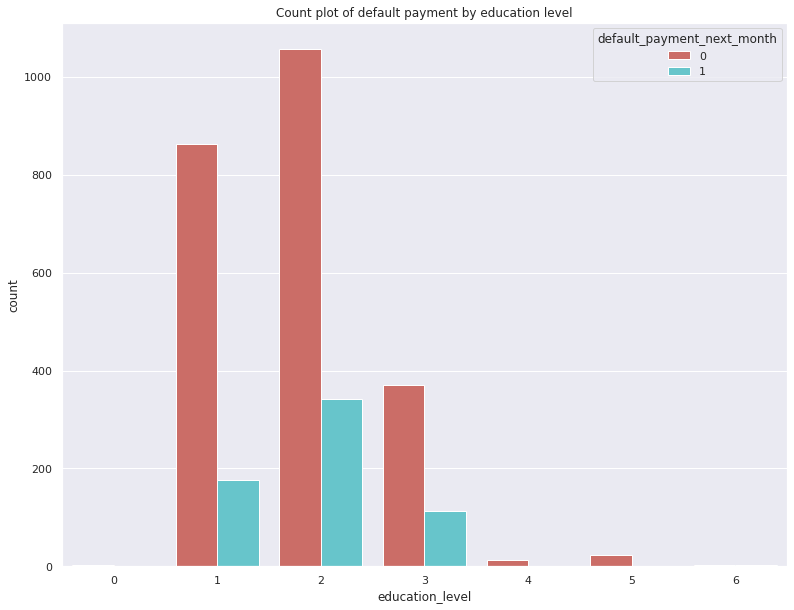

In [6]:
# Create plots

plt.figure(figsize=(13, 10))

# plt.subplot(1,2,1)
sns.countplot(x=raw_data['education_level'],hue=raw_data['default_payment_next_month'], palette='hls')
plt.title('Count plot of default payment by education level')

plt.show()


-Education Level 1 = Graduate School

-Education Level 2 = University Graduate

-Education Level 3 = High School Graduate

-Education Level 4 = Others (non high school graduate, never go to school, etc)

-Education Level 5 and 6 = unknown (we'll ignore this two)





As shown in the table above, the more educated the person is, the more likely they are to be in debt.
Probably because bank who give credit cards wont take risks giving credit cards to poor people, whom usually people who are not well educated.

In [7]:
# percentage of default payment by education level
for n in range(1, 5):
    percentage = raw_data[(raw_data['education_level'] == n) & (raw_data['default_payment_next_month'] == 1)]['education_level'].count() / raw_data[(raw_data['education_level'] == n)]['education_level'].count()* 100
    print(f'percentage default payment on education level = {n} is: {round(percentage, 2)}%')

percentage default payment on education level = 1 is: 17.04%
percentage default payment on education level = 2 is: 24.43%
percentage default payment on education level = 3 is: 23.4%
percentage default payment on education level = 4 is: 0.0%


-Education Level 1 = Graduate School

-Education Level 2 = University Graduate

-Education Level 3 = High School Graduate

-Education Level 4 = Others (non high school graduate, never go to school, etc)

In [8]:
# find out why default payment on education level = 4 is zero
raw_data[(raw_data['education_level'] == 4)]['education_level'].count()

13

After some calculations, we found that university graduate are more likely to get their credit cards defaulted (24.43% defaulted) followed by high school graduate (23.4% defaulted). The zero default rate on 'Others'(non high school graduate, never go to school, etc) might caused by small amount of data because bank wouldnt risk giving credits cards to poor people whom are uneducated, or they do give them credit cards, but with a smaller ceiling limits, which they could afford to pay off.

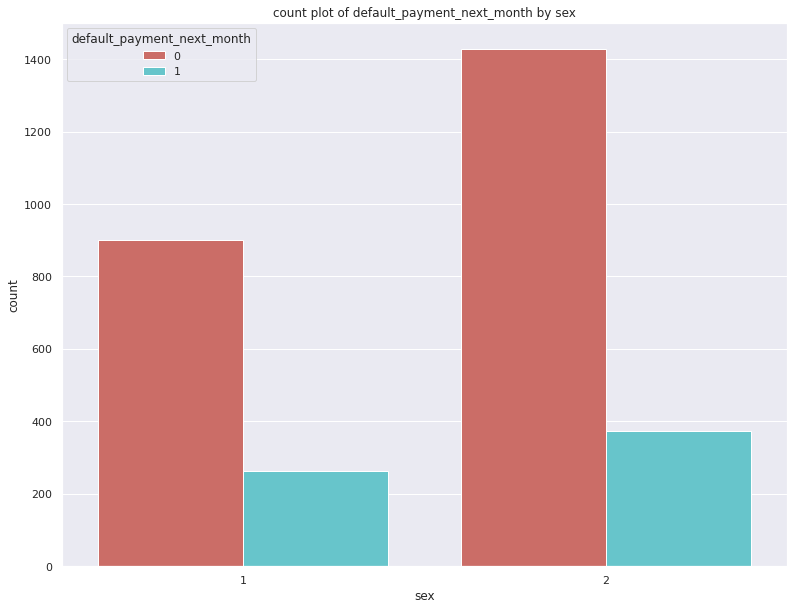

In [9]:
# Create plots

plt.figure(figsize=(13, 10))

# plt.subplot(1,2,1)
sns.countplot(x=raw_data['sex'],hue=raw_data['default_payment_next_month'], palette='hls')
plt.title('count plot of default_payment_next_month by sex')

plt.show()


-sex 1 = Male

-sex 2 = Female

In [10]:
# count of debt by sex
for n in range(1, 3):
    cout = raw_data[(raw_data['sex'] == n)]['sex'].count()
    print(f'count default payment on sex = {n} is: {cout}')

count default payment on sex = 1 is: 1163
count default payment on sex = 2 is: 1802


From the table and calculation above, we found that Women use credit cards more than men. The total women who use credit cards was 1163, while men was 1802.

In [11]:
# percentage of default payment by sex
for n in range(1, 3):
    percentage = raw_data[(raw_data['sex'] == n) & (raw_data['default_payment_next_month'] == 1)]['sex'].count() / raw_data[(raw_data['sex'] == n)]['sex'].count()* 100
    print(f'percentage default payment on sex = {n} is: {round(percentage, 2)}%')

percentage default payment on sex = 1 is: 22.53%
percentage default payment on sex = 2 is: 20.7%


Despite women uses more credit card than men, Men are more likely to get their credit card defaulted.

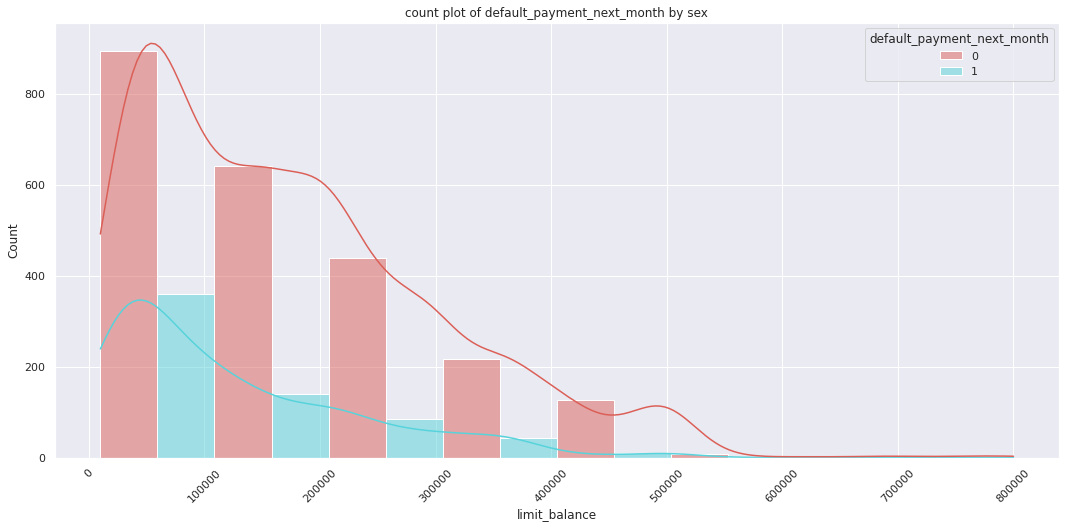

In [12]:
# Create plots

plt.figure(figsize=(18, 8))

# plt.subplot(1,2,1)
sns.histplot(x=raw_data['limit_balance'], hue=raw_data['default_payment_next_month'], palette='hls', multiple='dodge', kde=True, bins=8)
plt.xticks(rotation=45)
plt.title('count plot of default_payment_next_month by sex')

plt.show()


In [13]:
# count of default payment by limit balance
for n in (np.linspace(10000, 80000, 8)):
    n_min_1 = n - 10000
    count_by_limit = raw_data[(raw_data['limit_balance'] >= n_min_1) & (raw_data['limit_balance'] < n) & (raw_data['default_payment_next_month'] == 1)]['limit_balance'].count() / raw_data[(raw_data['limit_balance'] < n)]['limit_balance'].count()* 100
    print(f'percentage default payment on limit_balance < {n} is: {round(count_by_limit, 2)}%')

percentage default payment on limit_balance < 10000.0 is: nan%
percentage default payment on limit_balance < 20000.0 is: 45.65%
percentage default payment on limit_balance < 30000.0 is: 26.51%
percentage default payment on limit_balance < 40000.0 is: 14.36%
percentage default payment on limit_balance < 50000.0 is: 3.31%
percentage default payment on limit_balance < 60000.0 is: 10.51%
percentage default payment on limit_balance < 70000.0 is: 2.03%
percentage default payment on limit_balance < 80000.0 is: 2.08%


From the table and calculation above, we found that  the higher the limit balance, the less risk it got defaulted. The one lower than 60000 has 10.51, is probably outlier. perhaps because the only wealthy people have higher limit balance, and wealthy people can manage money better than other people.


# V. Data preprocessing

## V.I. define dataframe for inferencing

In [14]:
inf_count =  round(raw_data.shape[0]*0.05)
inf_count

148

In [15]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2937,210000,2,2,1,30,-1,-1,-2,-2,-2,-2,2818,0,0,0,0,0,0,0,0,0,0,0,0
2945,20000,1,2,1,45,-1,-1,-1,-1,-2,-2,836,836,2006,-2830,-7220,-11610,836,2006,1441,0,0,0,0
463,500000,1,2,2,33,0,0,0,0,0,0,134503,114682,124240,131006,137911,119343,20031,20029,20058,20127,10000,10027,0
1739,220000,1,1,2,37,2,2,0,0,0,0,185955,181587,186054,188465,192758,196493,0,9000,7000,7500,7100,7500,0
323,90000,2,3,1,33,0,0,0,0,0,0,86960,85585,87235,84511,84488,86184,3200,3114,3000,3100,3100,3500,1


In [16]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 2965
new data size: 2817


## V.II. Split train test dataset

In [17]:
# see whether data imbalance or not
raw_data['default_payment_next_month'].value_counts()

0    2330
1     635
Name: default_payment_next_month, dtype: int64

In [18]:
# define features variable as X
X = raw_data_1.drop('default_payment_next_month', axis=1)

In [19]:
# define target variable as y
y = raw_data_1['default_payment_next_month']
y.sample(5)

1471    0
1054    0
1817    1
2356    1
2047    0
Name: default_payment_next_month, dtype: int64

In [20]:
# Slit the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=33, stratify=y)

print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')

Train size: 2535
Test size: 282


## V.III. Handling empty values

In [21]:
# sum null value
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_0              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

after chechking the dataset, there is no empty value found.

## V.IV. Handling Outlier

In [22]:
# sumarize current dataset
X_train.sample(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
724,50000,2,3,1,57,0,0,0,0,0,0,50990,49123,50820,50706,30636,30501,2100,2500,3820,1636,1501,1700
235,250000,1,1,1,34,0,0,0,0,0,0,279640,252913,243075,245750,175005,179687,65000,8800,9011,6000,7000,6009
1904,50000,1,2,2,39,1,2,2,2,2,2,39966,37584,38423,37212,39319,36082,0,3000,0,3007,7,3119
2781,50000,1,1,2,30,-1,-1,-1,-1,-1,-1,390,390,390,390,390,23269,390,390,390,390,23269,1500
2616,120000,1,1,2,27,-1,-1,-1,-1,-1,-1,880,880,880,880,880,1030,880,880,880,880,1030,880
2165,50000,2,3,2,22,-2,-2,-2,-2,-2,-2,2498,-2,1697,0,0,5000,0,1699,0,0,5000,0
2405,150000,2,2,1,28,-1,-1,-1,0,0,0,108,-218,63174,43374,43950,44501,0,65748,1537,1585,1597,1615
1775,100000,2,2,1,46,1,2,2,0,0,0,97515,99028,96592,99801,27930,27377,4000,0,5000,2000,1116,1500
671,220000,2,2,2,28,0,0,0,0,0,0,43436,46883,44179,44704,44997,45199,5012,2500,2000,2000,3000,3000
882,50000,1,2,2,28,0,0,0,0,0,0,23244,24364,25454,26030,26609,27662,1500,1500,1000,1000,1500,1100


In [23]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [24]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    if -0.5 > skew_value < 0.5:
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else:
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundery= feature.quantile(0.25)-(IQR*1.5)
        upper_boundery= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundery, upper_boundery

In [25]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [26]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['limit_balance', 'sex', 'education_level', 'marital_status', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Categorical Columns :  []


Since there are no categorical features, we will ignore it for the rest of the analysis

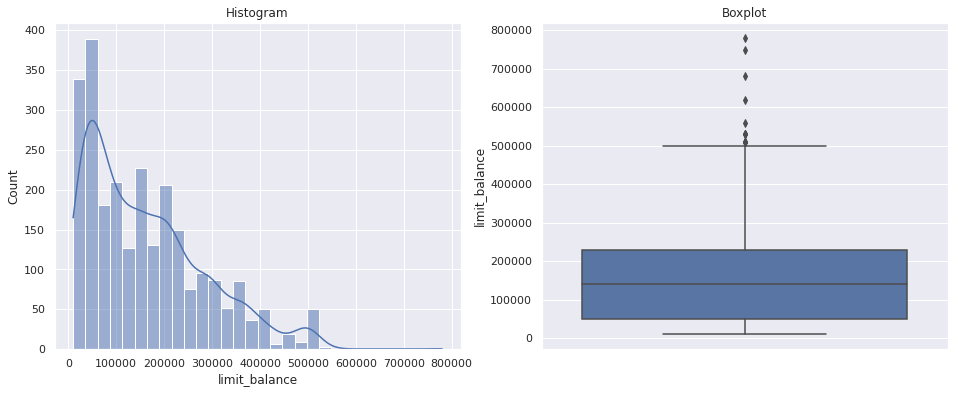

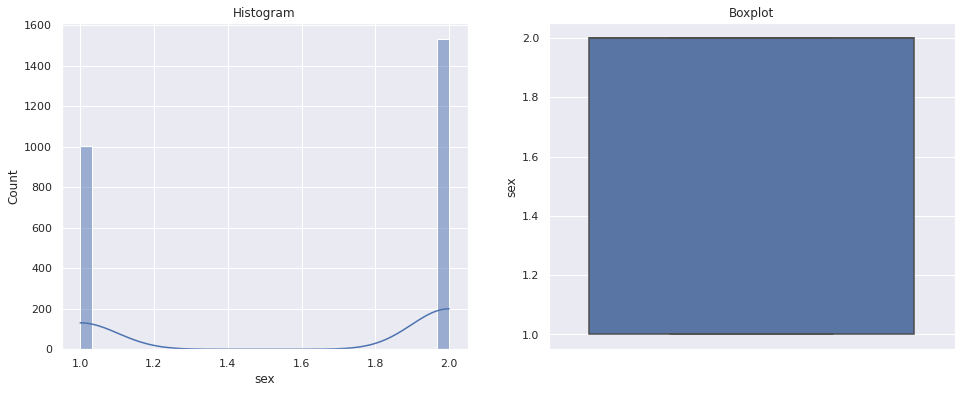

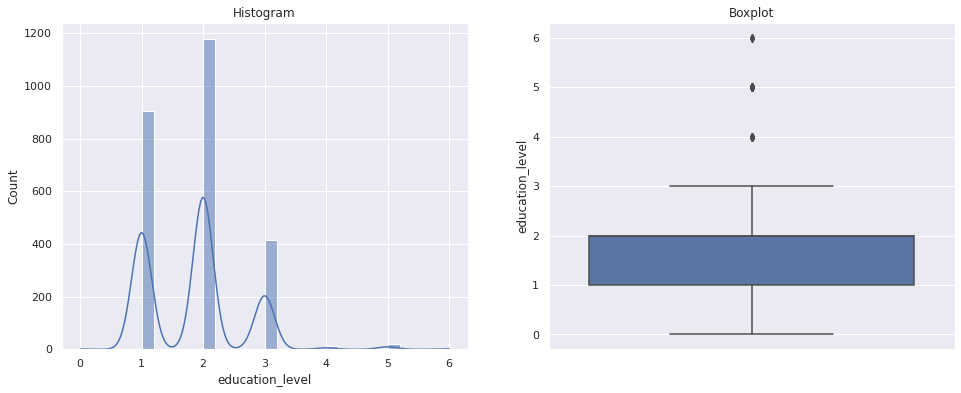

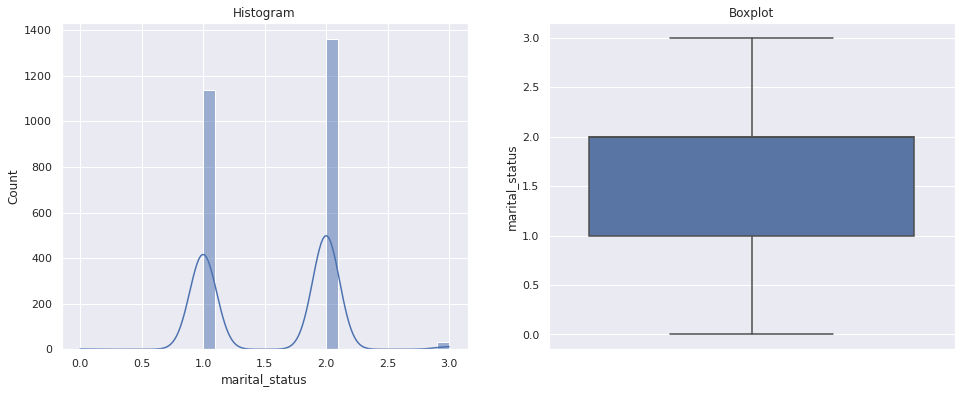

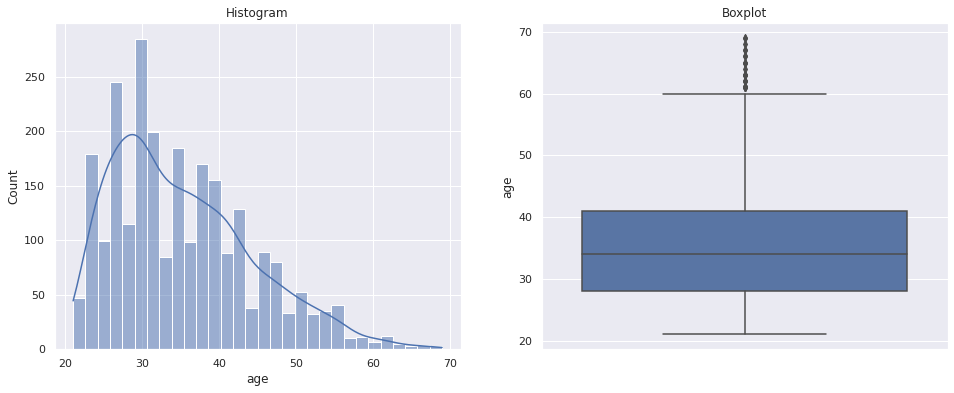

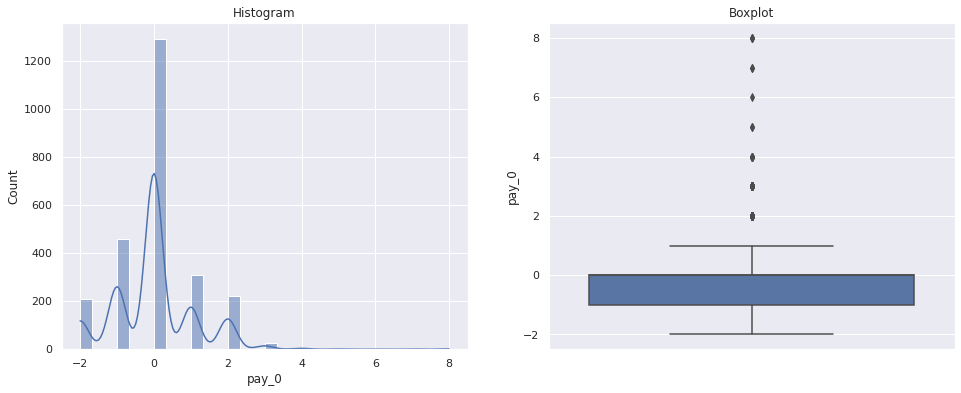

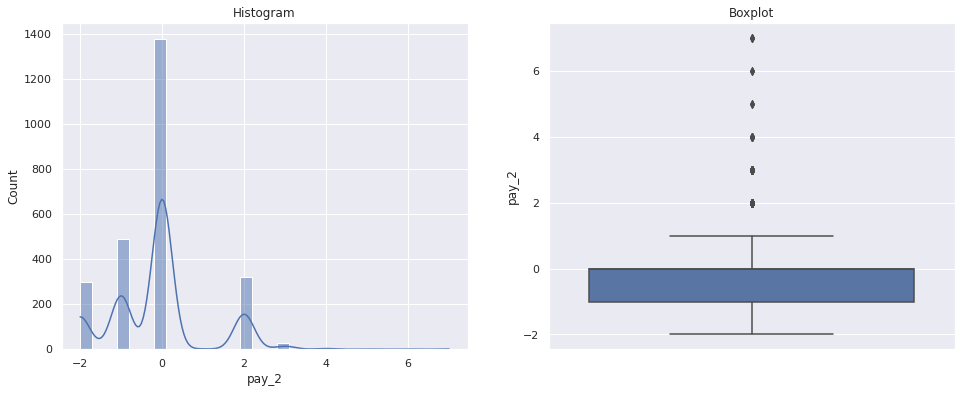

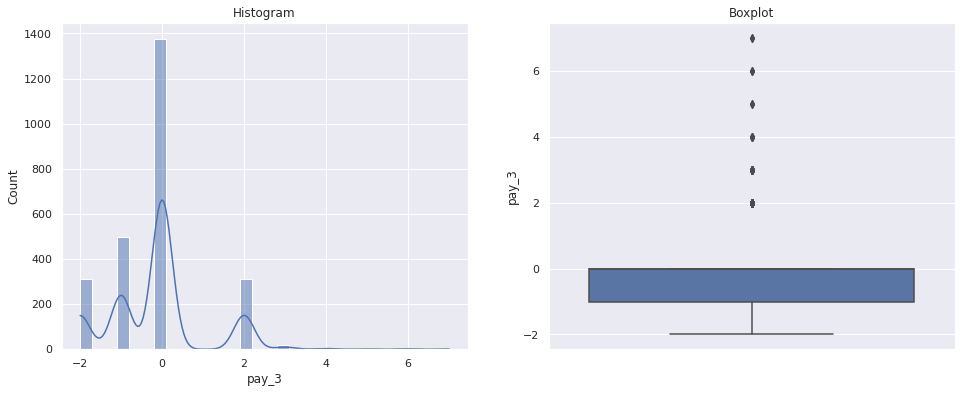

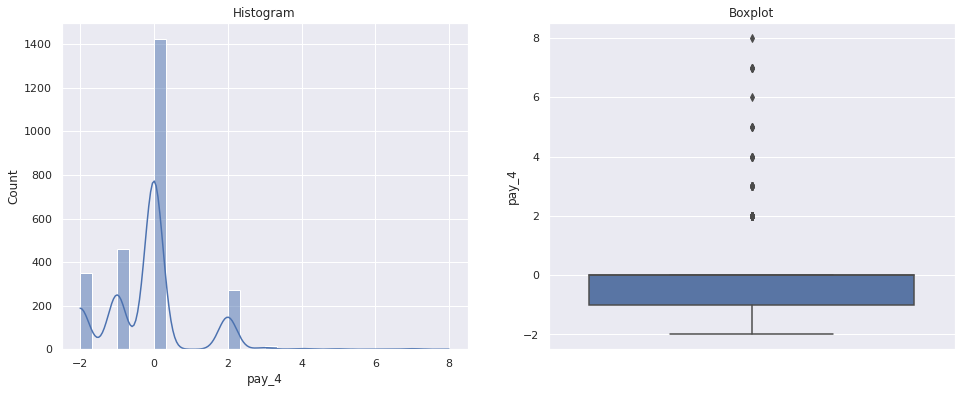

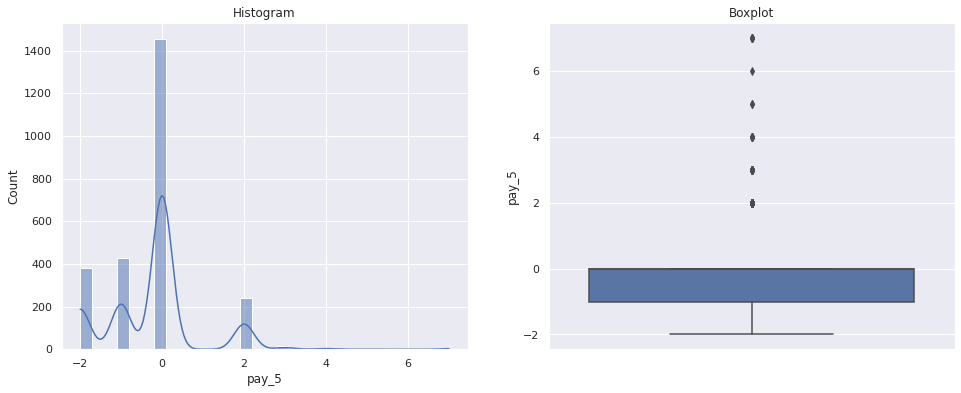

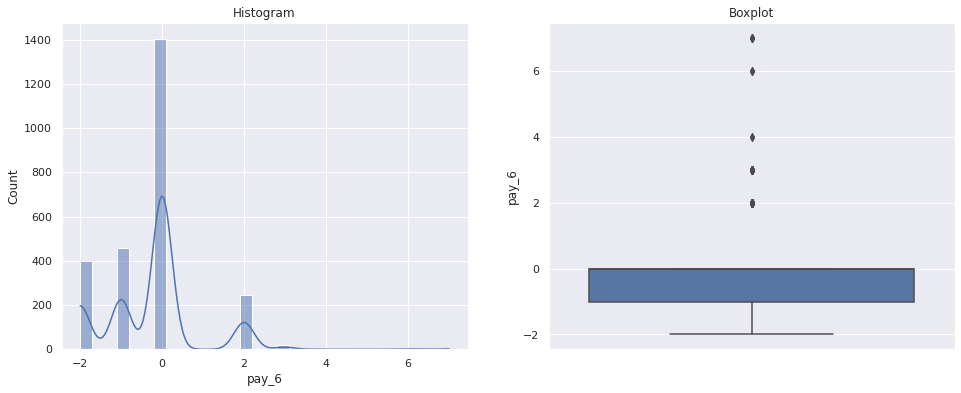

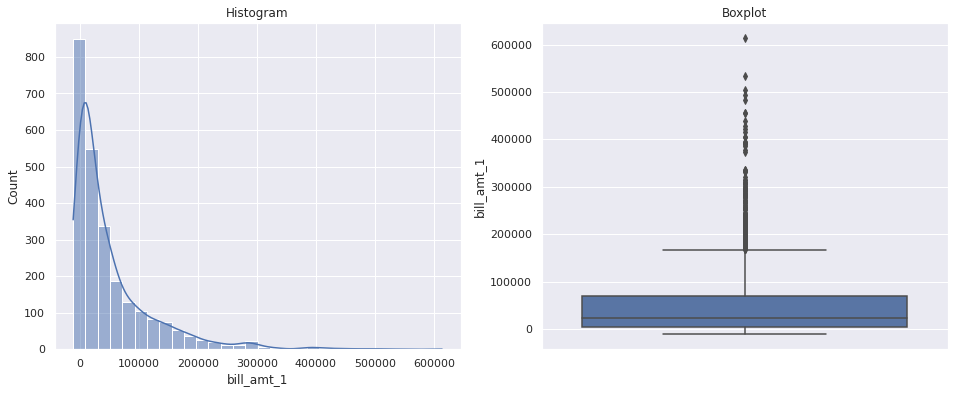

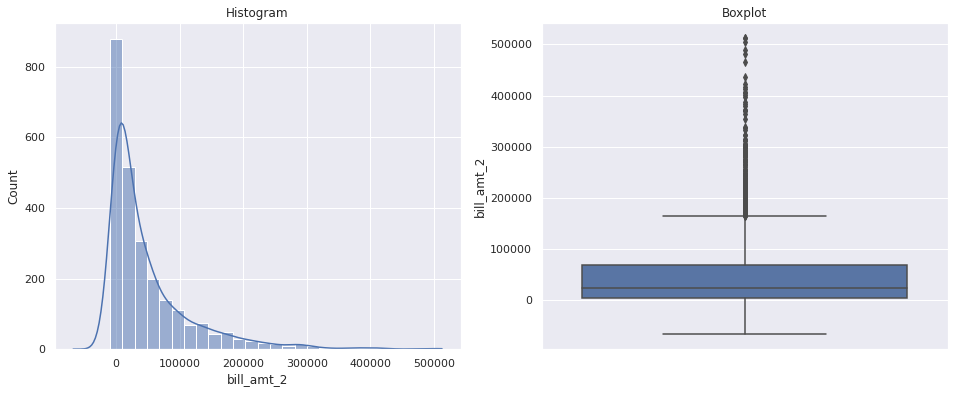

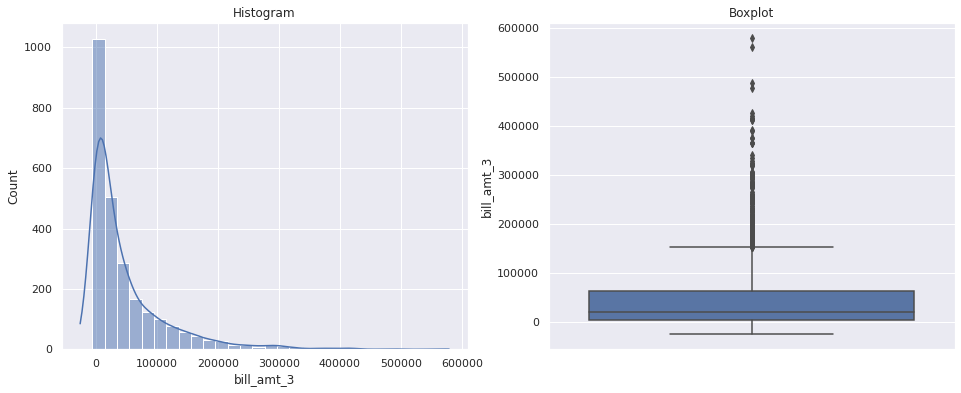

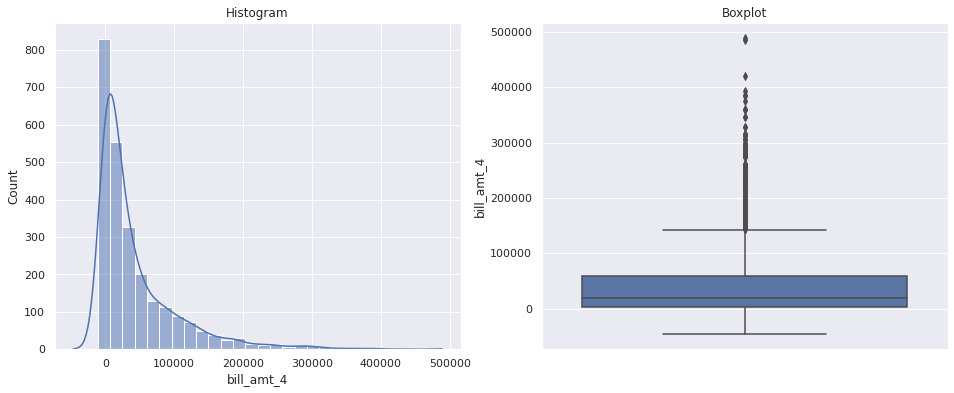

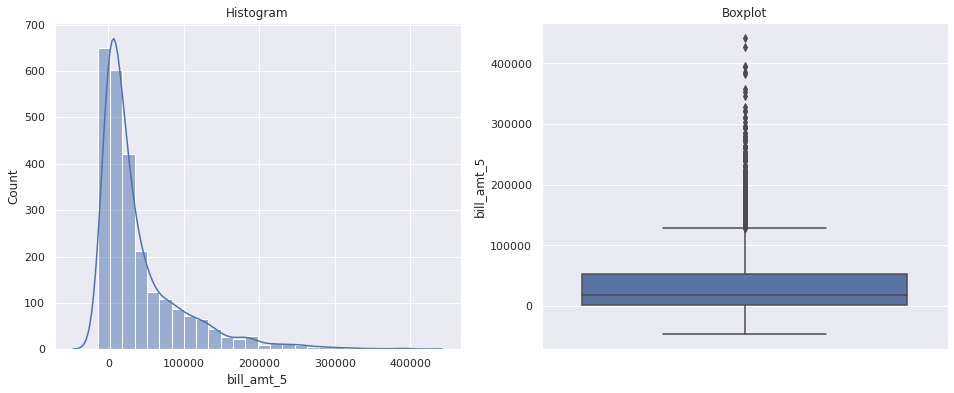

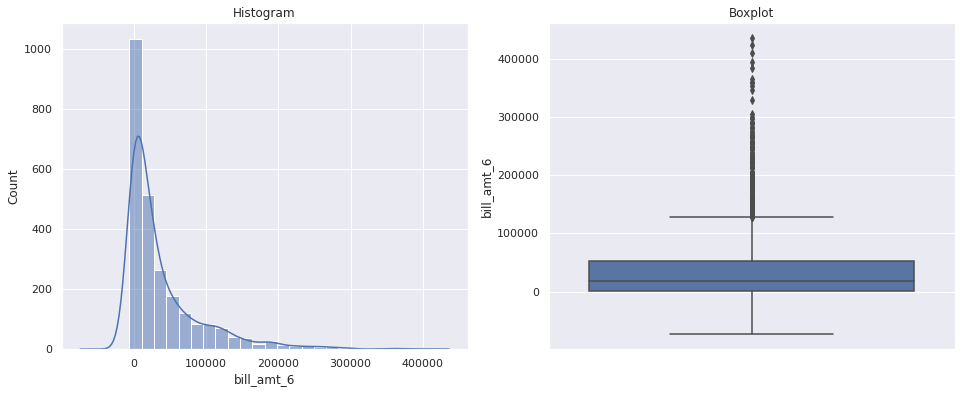

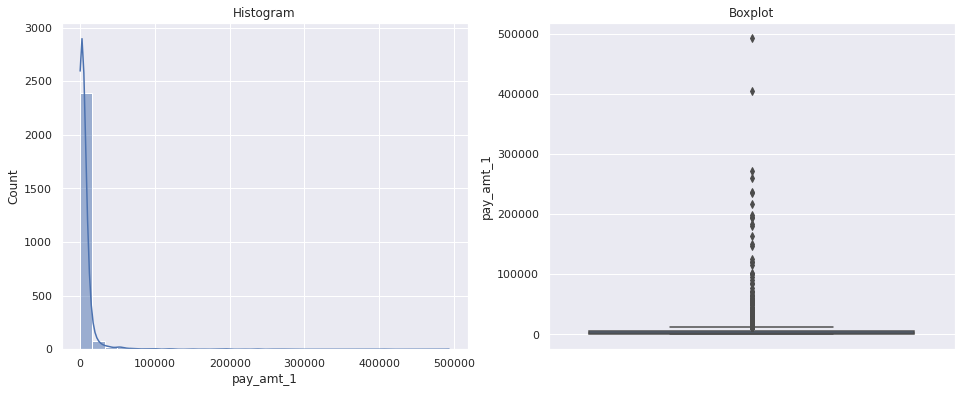

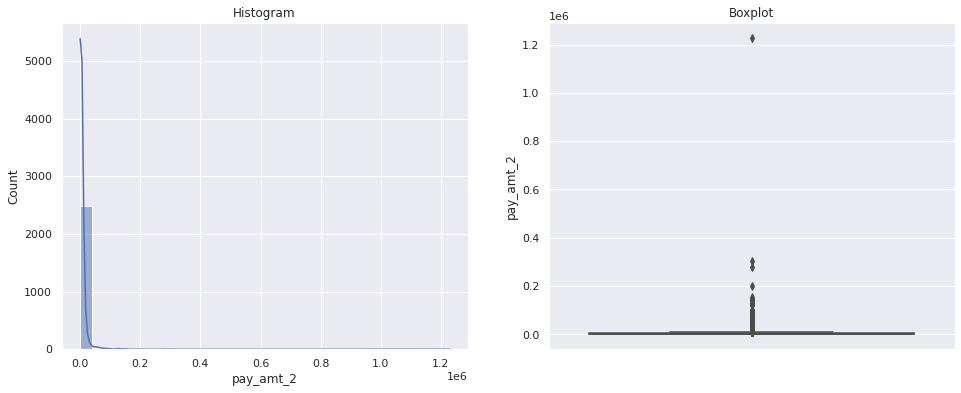

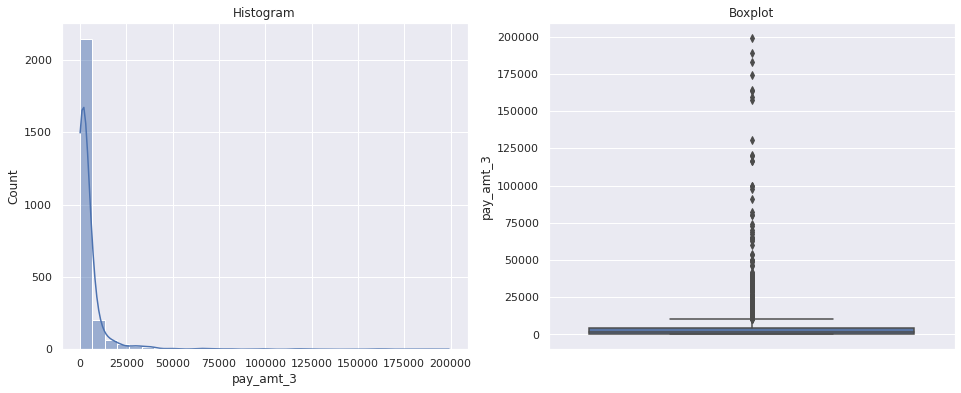

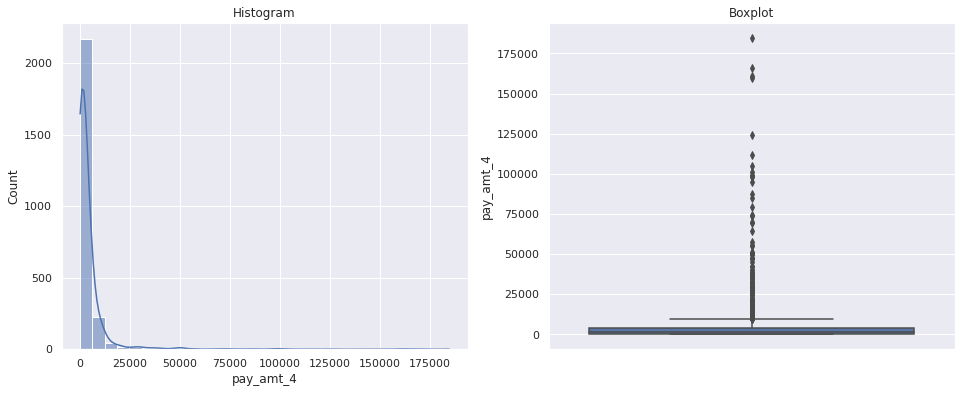

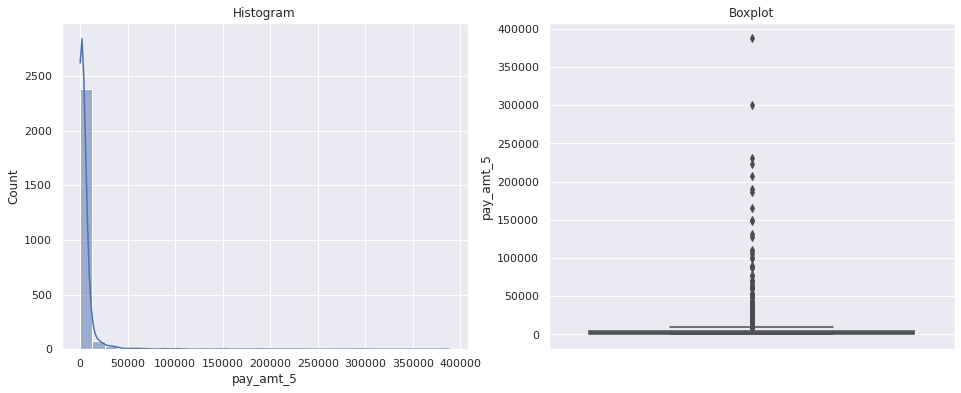

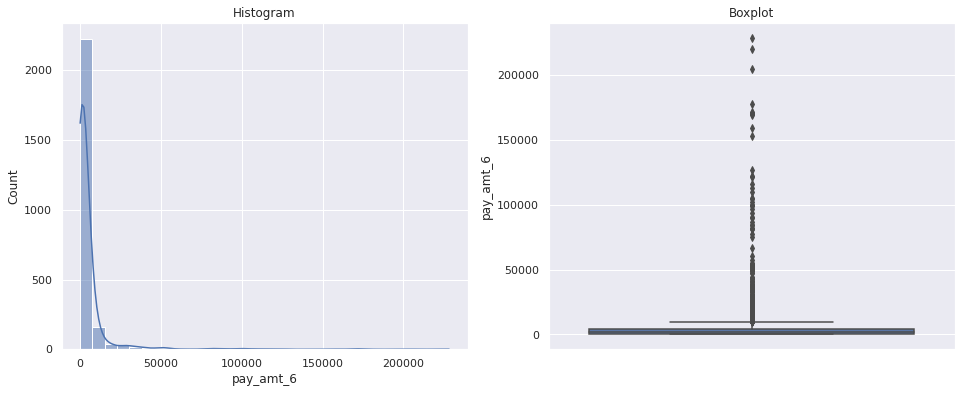

In [27]:
# plotting for numerical columns
for i in num_columns:
  outlier_plot(X_train[i])

there are several features with outlier like limit_balance, age, education_level, bill amount, etc...
this outlier would make our model less accurate and bias.

In [28]:
# Capping numerical columns
X_train_2 = X_train.copy()
for i in num_columns:
    capping_data(X_train_2, i)

In [29]:
# # recheck for outlier_list
# for i in num_columns:
#   outlier_plot(X_train_2[i])

## V.V Feature Selection

In [30]:
# find corelation between features
X_train_cor = X_train_2.corr() 

In [31]:
# summarize correlation between features
X_train_cor

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
limit_balance,1.000000,0.013213,-0.242519,-0.103443,0.124047,-0.226230,-0.293929,-0.289227,-0.249433,-0.237269,-0.228703,0.227098,0.225968,0.232475,0.243613,0.237493,0.236714,0.354229,0.354636,0.366938,0.339178,0.357817,0.366712
sex,0.013213,1.000000,-0.006806,-0.009158,-0.134767,-0.068277,-0.088256,-0.093737,-0.059562,-0.043804,-0.039556,-0.056156,-0.046454,-0.036148,-0.024998,-0.026667,-0.033504,-0.011270,-0.003632,-0.002883,-0.000252,-0.010783,0.005172
education_level,-0.242519,-0.006806,1.000000,-0.143971,0.218292,0.093901,0.124543,0.127449,0.115508,0.110884,0.090344,0.027323,0.022939,0.018314,-0.001841,-0.004576,-0.000423,-0.072260,-0.088891,-0.084933,-0.061598,-0.077771,-0.082087
marital_status,-0.103443,-0.009158,-0.143971,1.000000,-0.417299,-0.001769,0.057678,0.046808,0.051770,0.049649,0.050544,-0.018827,-0.014707,-0.014617,-0.012572,-0.008438,-0.001884,-0.009937,-0.019564,-0.019437,-0.009880,-0.009598,-0.013875
age,0.124047,-0.134767,0.218292,-0.417299,1.000000,-0.001936,-0.065304,-0.056622,-0.070120,-0.078133,-0.057887,0.072575,0.063847,0.052774,0.039637,0.046240,0.044333,0.044374,0.022825,0.012122,0.051248,0.037591,0.020079
pay_0,-0.226230,-0.068277,0.093901,-0.001769,-0.001936,1.000000,0.619004,0.519222,0.482260,0.465923,0.451336,0.234427,0.226754,0.221090,0.218617,0.207080,0.204668,-0.109944,-0.111631,-0.092464,-0.074398,-0.075477,-0.097108
pay_2,-0.293929,-0.088256,0.124543,0.057678,-0.065304,0.619004,1.000000,0.776806,0.661243,0.628953,0.597865,0.327863,0.314219,0.306442,0.302157,0.294082,0.287287,-0.055074,-0.014013,-0.005500,0.001100,0.001055,-0.025429
pay_3,-0.289227,-0.093737,0.127449,0.046808,-0.056622,0.519222,0.776806,1.000000,0.749338,0.684349,0.624202,0.303840,0.340057,0.327013,0.322378,0.318001,0.301538,0.104321,-0.048471,0.010096,0.028481,0.010185,-0.006917
pay_4,-0.249433,-0.059562,0.115508,0.051770,-0.070120,0.482260,0.661243,0.749338,1.000000,0.822541,0.712993,0.304708,0.332346,0.369047,0.366705,0.364896,0.353329,0.081186,0.135801,-0.009808,0.062014,0.049606,0.029589
pay_5,-0.237269,-0.043804,0.110884,0.049649,-0.078133,0.465923,0.628953,0.684349,0.822541,1.000000,0.813603,0.290727,0.318863,0.355821,0.393231,0.394797,0.372821,0.063892,0.108022,0.137167,0.038524,0.052621,0.064377


There are several features that has a corelation score higher than 0.5 (ex: bill amount 5 is highly corelated with other bill amount), but after several testing some of the highly correlated features better left alone for better modelling.

In [32]:
# drop some of the highly corelated features on training data
X_train_2.drop(['bill_amt_5', 'bill_amt_4', 'bill_amt_3', 'bill_amt_2'], axis=1, inplace=True)

In [33]:
# drop some of the highly corelated features on test data
X_test_2 = X_test.drop(['bill_amt_5', 'bill_amt_4', 'bill_amt_3', 'bill_amt_2'], axis=1, )

In [34]:
# make new list for numeric columns
num_columns = X_train_2.select_dtypes(include=np.number).columns.tolist()

## V.VI. Feature Scaling

In [35]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_2)

X_train_scaled = scaler.transform(X_train_2)
X_test_scaled = scaler.transform(X_train_2)

In [36]:
X_train_scaled

array([[0.42857143, 1.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.26530612, 1.        , 0.57142857, ..., 0.62774639, 0.09325407,
        1.        ],
       [0.40816327, 1.        , 0.57142857, ..., 0.14040594, 0.10731455,
        0.20170949],
       ...,
       [0.08163265, 1.        , 0.85714286, ..., 1.        , 0.31139829,
        0.30437962],
       [0.2244898 , 1.        , 0.28571429, ..., 0.41849759, 0.3721892 ,
        0.20170949],
       [1.        , 0.        , 0.28571429, ..., 0.28698472, 0.31015766,
        1.        ]])

In [37]:
# Create dataframe for X numeric features
X_train_3 = pd.DataFrame(X_train_scaled, columns=X_train_2.columns)
X_train_3.sample(5)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
689,1.000000,1.0,0.571429,0.666667,0.405063,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.353086,0.557837,0.450250,0.363389,0.284084,0.554509,0.516929,0.504274
119,0.142857,1.0,0.571429,0.666667,0.075949,0.571429,0.571429,1.000000,1.000000,1.000000,1.000000,0.457894,0.749470,0.565530,0.238837,0.000000,0.627746,0.000000,0.302564
2367,0.020408,0.0,0.571429,0.333333,0.886076,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.163618,0.461067,0.000000,0.206496,0.000000,0.196903,0.000000,0.000000
1484,0.122449,0.0,0.571429,0.333333,0.556962,0.571429,0.571429,0.571429,0.571429,0.571429,0.571429,0.584241,0.396178,0.311267,0.193232,0.058521,0.077213,0.012923,0.000000
1775,0.020408,1.0,0.571429,0.333333,0.000000,0.285714,0.571429,0.571429,0.571429,1.000000,0.571429,0.162930,0.411434,0.126495,0.209130,0.227267,0.000000,0.206772,0.302564


# VI. Cross Validation model

In [38]:
# Duplicate X data
X_train_cleaned = X_train_3.copy()

In [39]:
# Define model
log_reg = LogisticRegression()
SVM_model = SVC()
dt_model = DecisionTreeClassifier()
rand_forest_model = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
gradient_boost = GradientBoostingClassifier()

#### Cross-validation score with accuracy

In [40]:
# Cross-validation
model_score = []
std_score = []
final_score =[]

for modelling in [log_reg, SVM_model, dt_model, rand_forest_model, knn, nb, gradient_boost]:
    scores = cross_val_score(modelling, X_train_cleaned, y_train, cv=5)
    model_score.append(scores.mean())
    std_score.append(scores.std())

for x in range(len(model_score)):
    fin = model_score[x] - std_score[x]
    final_score.append(fin)

table_score = pd.DataFrame({
    'Model' : ['logistic regression', 'SVM', 'Distribution tree', 'Random Forest', 'K Nearest Neighbor', 'Naive Bayes', 'Gradient Boost'],
    'final score' : final_score
})


In [41]:
# rank model by scores and staandard deviation
print('Sorted by final score')
print(table_score.sort_values(by='final score', ascending=False).reset_index(drop=True))

Sorted by final score
                 Model  final score
0                  SVM     0.820239
1       Gradient Boost     0.814945
2  logistic regression     0.814031
3        Random Forest     0.804882
4   K Nearest Neighbor     0.791607
5          Naive Bayes     0.739638
6    Distribution tree     0.728260


It can be seen that when sorted according to the mean, the highest accuracy is achieved by SVM. Since accuracy is bad for looking at an imbalance dataset(eg: payment not default= 2330, while default = 635). We're using f1 score instead. We use f1score because it Takes into account how the data is distributed. For example, if the data is highly imbalanced (e.g. 85% not defaulted and 10% defaulted) then F1 score will provide a better assessment of model performance.

#### Cross-validation score with F1 score

In [42]:
# Cross-validation
model_score = []
std_score = []
final_score = []

for modelling in [log_reg, SVM_model, dt_model, rand_forest_model, knn, nb, gradient_boost]:
    scores = cross_val_score(modelling, X_train_cleaned, y_train, cv=5, scoring='f1')
    model_score.append(scores.mean())
    std_score.append(scores.std())

# model_score minus standard deviation
for x in range(len(model_score)):
    fin = model_score[x] - std_score[x]
    final_score.append(fin)

table_score = pd.DataFrame({
    'Model' : ['logistic regression', 'SVM', 'Distribution tree', 'Random Forest', 'K Nearest Neighbor', 'Naive Bayes', 'Gradient Boost'],
    'final score' : final_score
})


In [43]:
# rank model by final scores
print('Sorted by final score')
print(table_score.sort_values(by='final score', ascending=False).reset_index(drop=True))

Sorted by final score
                 Model  final score
0          Naive Bayes     0.464481
1       Gradient Boost     0.458778
2        Random Forest     0.436730
3                  SVM     0.419711
4    Distribution tree     0.374409
5   K Nearest Neighbor     0.360058
6  logistic regression     0.350013


It can be seen that when sorted according to the mean, the highest accuracy is achieved by Naive Bayes, this might be the best choice, but Since naive bayes has almost no hyperparameters to tune* (only smoothing) which could improves our model, we choose Gradient Boost instead.


*source = https://towardsdatascience.com/understanding-the-naive-bayes-classifier-16b6ee03ff7b#:~:text=Also%2C%20naive%20Bayes%20has%20almost%20no%20hyperparameters%20to,you%20will%20want%20to%20go%20with%20another%20algorithm

# VII. Define chosen model (Gradient boost) with gridsearch

In [44]:
# make list of hyperparameter input 
param = {
    'learning_rate' : [0.085, 0.01, 0.03],
    'n_estimators' : [100, 130, 1000],
    'criterion' : ['friedman_mse', 'squared_error']
}

# define gradient boost with chosen model
grid_search = GridSearchCV(gradient_boost, param, cv=5, scoring='f1')

In [45]:
# fitting dataset with grid_search
grid_search.fit(X_train_cleaned, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'n_estimators': 1000}
Best cross-validation score: 0.51


In [46]:
# define new parameter with the best choice
param_new=grid_search.best_estimator_

In [47]:
# summarize new parameter
param_new

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

# VIII. Train chosen model (Gradient boost)

In [48]:
# Training the model
y_train_pred=param_new.predict(X_train_cleaned)
y_test_pred=param_new.predict(X_test_2)

# IX. Evaluate chosen model (Gradient boost)

In [49]:
# Evaluate training model
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.83      0.49      0.61       544

    accuracy                           0.87      2535
   macro avg       0.85      0.73      0.77      2535
weighted avg       0.86      0.87      0.85      2535



Since the data is imbalanced, for accuracies measures we use f1score because it Takes into account how the data is distributed. For example, if the data is highly imbalanced (e.g. 85% not defaulted and 10% defaulted) then F1 score will provide a better assessment of model performance. the closer to 1, the more accurate the data. the f1score for the training model is 0.61, this is considers 'ok' not good not bad.

In [50]:
# Evaluate test model
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       222
           1       0.59      0.58      0.59        60

    accuracy                           0.83       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.83      0.83      0.83       282



For the test data, the f1score is 0.56, this score is 'ok'. The f1score before tune was 0.459071. There's clearly an improvement.

### Model Analysis

Rather straight up start modelling, we use cross-validation to check which model shows the best results. Cross-validation is a technique that is used for the assessment of how the results of statistical analysis generalize to an independent data set. After that we found naive bayes to be the best model to be used. But Since naive bayes lack of tools(hyperparameters) for tuning, we decided to use gradient boost instead. After all the difference between gradientboost and naive bayes is really small. 

After some tuning we expect gradientboost could push better f1-score (F1 score is a metric to measures accuracies for clasiffications, highest score is 1). Turns out that was the case, on cross-validation we only got f1-score of 0.459071 , after tuning we got 0.56, which is quite impressive. But still for f1 score of 0.56 nor bad nor good its just 'ok'. Compares to the training data, there's a little bit of overfitting on training we got 0.61 on test set we got 0.56, the difference is just a mere 0.05, its not that bad though. 

The plus side if we want to predict which customers wont get defaulted, its fairly accurate with f1score 0.89.

We could do some improvements with the model using a larger range of hyperparameters, but it could take a long time to get the right setup. Or we just change to other models like random forest, after all the difference of f1 score is small, all it takes is a good set of hyperparameters.

# X. Model Saving

In [51]:
# save model
with open('gradient_boost.pkl', 'wb') as file_1:
  joblib.dump(param_new, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

# XI. Model Inference

In [52]:
# save model
with open('gradient_boost.pkl', 'rb') as file_1:
  model_gradient_boost = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('list_num.txt', 'r') as file_4:
  model_num_list = json.load(file_4)

In [53]:
# display inference-set
data_inf.sample(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
630,400000,2,1,2,39,0,0,0,0,0,0,404924,359634,360270,325340,328627,329948,13521,12374,11643,11868,18000,15000,0
2340,30000,1,3,1,52,2,3,2,0,0,0,31521,30749,29506,29106,29106,29700,0,0,0,0,594,0,0
2387,170000,1,1,2,31,-1,-1,-1,-1,0,-1,959,1898,850,6390,1958,1346,1911,850,6390,5,1358,202,0
448,120000,2,1,2,24,0,0,0,0,0,0,75796,76004,67187,49924,33188,19826,3700,2023,2016,2000,1200,1000,0
1142,80000,2,2,1,27,0,0,0,0,0,0,77039,78746,79757,40498,29212,29621,2984,2449,1612,798,1307,359,1
529,270000,2,3,1,41,0,0,0,0,0,0,48872,43688,35638,41704,43869,45160,3688,2638,6704,2869,2000,1686,0
1800,200000,1,3,2,43,3,2,2,2,2,2,2500,2500,2500,2500,2500,2500,0,0,0,0,0,0,1
1772,30000,2,1,2,22,2,2,0,0,0,-1,29188,25908,19998,15675,8240,438,0,1441,1000,165,438,0,1
1315,50000,2,2,2,25,0,0,2,0,0,0,39033,37002,21933,16137,16030,15373,6455,0,1500,3000,5000,5000,0
832,300000,2,2,2,28,0,0,0,0,0,0,199801,121321,94524,86637,78939,70689,5017,3200,3500,3000,3000,74000,0


In [54]:
# drop unecessary data
data_inf_num = data_inf_num = data_inf[model_num_list]

In [55]:
# scale
data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_num_scaled

array([[0.08163265, 0.        , 0.85714286, ..., 0.28970496, 0.17575601,
        0.        ],
       [0.12244898, 1.        , 0.28571429, ..., 0.53766478, 0.10338589,
        0.10085474],
       [0.2244898 , 0.        , 0.28571429, ..., 0.36618539, 0.31015766,
        7.78931444],
       ...,
       [0.71428571, 1.        , 0.57142857, ..., 1.04624398, 1.03385888,
        0.        ],
       [0.10204082, 1.        , 0.57142857, ..., 0.        , 0.51692944,
        0.20170949],
       [0.30612245, 1.        , 0.28571429, ..., 0.50481272, 0.62031533,
        0.5399763 ]])

In [56]:
# predict using logistic regression
y_pred_inf = model_gradient_boost.predict(data_inf_num_scaled)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [57]:
# create dataframe of rating pred

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['overall prediction'])
y_pred_inf_df.head()

,overall prediction
0,0
1,0
2,0
3,0
4,0


In [58]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [59]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month,overall prediction
0,50000,1,3,0,50,0,0,0,-1,-1,-1,45771,23343,0,3400,2769,0,2266,0,3400,2769,1700,0,0,0
1,70000,2,1,2,50,0,0,0,0,0,0,64315,58564,56741,25172,29186,25430,3000,10032,8000,5139,1000,1000,1,0
2,120000,1,1,2,27,0,0,0,0,0,0,117324,91457,94478,74807,76952,0,3500,5390,3200,3500,3000,77233,0,0
3,200000,1,2,1,40,1,2,2,0,-1,0,303719,268163,228720,234177,201490,190721,5133,0,5857,202076,6726,5346,0,0
4,50000,1,2,2,31,1,2,0,0,0,-1,51086,49804,28662,29476,4011,1000,0,2000,1500,1000,1000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,100000,1,2,2,25,0,0,0,0,0,0,86098,85014,86735,87321,82289,83850,3200,3155,3504,3001,3301,2839,0,0
144,40000,2,1,2,24,0,0,0,2,2,0,29782,32298,34610,35326,23489,11762,3000,3000,1500,0,1000,500,1,0
145,360000,2,2,1,37,-1,-1,0,-1,-1,-1,10000,17444,17165,10000,10000,10000,17444,10035,10000,10000,10000,0,0,0
146,60000,2,2,1,31,0,0,2,2,2,2,37549,40603,39676,42407,41428,45576,4000,0,3700,0,5000,2000,1,1


In [60]:
print(classification_report(data_final['default_payment_next_month'] ,data_final['overall prediction']))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       117
           1       0.61      0.35      0.45        31

    accuracy                           0.82       148
   macro avg       0.73      0.65      0.67       148
weighted avg       0.80      0.82      0.80       148



# XII. Conclusions


After we explore the data we found more educated the person is, the more likely they are to be in debt. Probably because bank who give credit cards wont take risks giving credit cards to poor people, whom usually people who are not well educated. We also found that university graduate are more likely to get their credit cards defaulted (24.43% defaulted) followed by high school graduate (23.4% defaulted). Women use credit cards more than men. Despite that findings, Men are more likely to get their credit card defaulted. The higher the limit balance, the less risk it got defaulted. Because the only wealthy people have higher limit balance, and wealthy people can manage money better than other people.

we use cross-validation to check which model shows the best results. Cross-validation is a technique that is used for the assessment of how the results of statistical analysis generalize to an independent data set. After that we found naive bayes to be the best model to be used. But Since naive bayes lack of tools(hyperparameters) for tuning, we decided to use gradient boost instead. After some tuning we get a better score of 0.56, a 0.1 difference compared to before. But still for f1 score of 0.56 its just an 'ok' score. We could do some improvements with the model using a larger range of hyperparameters, but it could take a long time to get the right setup. Or we just change to other models like random forest, after all the difference of f1 score is small, all it takes is a good set of hyperparameters.

If we want to get customers with less risk , we should get more women, wealthier, and more educated people.
